# AUDIO CLASSIFICATION

The aim of this project is to perform multi-label classification on Audio data. The audio files are short audio samples with different informations like GENRE, CATEGORY, INSTRUMENT, KEY etc..
<br>
- There are total 29220 audio files
<br>
- First we will focus on the GENRE classification of the audio files and then the similar approach will be used to classify other categories

In [2]:
# !pip install librosa

In [3]:
# !pip install -U imbalanced-learn

### Importing important libraries

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

### Dataset Details
we have a csv file with details of all the folders where folders are the genre name and the files inside the folders are the audio files of that genre


In [5]:
# reading the metadata- csv file

metadata=pd.read_csv('C:/Users/singh/Documents/Audio classification using tensor flow/AI in Industry_Project/samples.csv')
metadata.head()


,path,genre,category,subcategory,key type,key signature,time signature,beat count,Single,Ensemble,...,Acoustic,Electric,Melodic,Dissonant,Relaxed,Intense,Part,Fill,Cheerful,Dark
0,01 Hip Hop/Abandoned Brass Stabs.caf,Hip Hop,Trumpet,Trumpet,minor,E,4/4,8.0,True,False,...,False,True,True,False,False,False,True,False,False,True
1,01 Hip Hop/Abandoned Orchestral Layers.caf,Hip Hop,Timpani,Timpani,minor,E,4/4,16.0,False,True,...,False,True,False,False,False,True,True,False,False,True
2,01 Hip Hop/Afloat Beat.caf,Hip Hop,Electronic Beats,Electronic Beats,NaN,NaN,4/4,32.0,True,False,...,False,True,False,False,False,False,True,False,False,False
3,01 Hip Hop/Afloat Pad.caf,Hip Hop,Synthesizer,Synthesizer,minor,C,4/4,32.0,True,False,...,False,True,True,False,True,False,True,False,False,False
4,01 Hip Hop/Afloat Sub Bass.caf,Hip Hop,Synthetic Bass,Synthetic Bass,minor,C,4/4,32.0,True,False,...,False,True,True,False,False,False,True,False,False,False


In [6]:
metadata['path']

0              01 Hip Hop/Abandoned Brass Stabs.caf
1        01 Hip Hop/Abandoned Orchestral Layers.caf
2                        01 Hip Hop/Afloat Beat.caf
3                         01 Hip Hop/Afloat Pad.caf
4                    01 Hip Hop/Afloat Sub Bass.caf
                            ...                    
29215     Watch the Sound/Warm Embers Guitar 07.caf
29216     Watch the Sound/Warm Embers Guitar 08.caf
29217     Watch the Sound/Warm Embers Guitar 09.caf
29218     Watch the Sound/What's The Deal Horns.caf
29219          Watch the Sound/Yo Check It Beat.caf
Name: path, Length: 29220, dtype: object

In [7]:
# changing the format of the path column to later join with the actuala path of the folder structure
metadata['path']=metadata['path'].str.replace('caf','mp3')
metadata['path']=metadata['path'].str.replace('/','\\')

metadata.head()

,path,genre,category,subcategory,key type,key signature,time signature,beat count,Single,Ensemble,...,Acoustic,Electric,Melodic,Dissonant,Relaxed,Intense,Part,Fill,Cheerful,Dark
0,01 Hip Hop\Abandoned Brass Stabs.mp3,Hip Hop,Trumpet,Trumpet,minor,E,4/4,8.0,True,False,...,False,True,True,False,False,False,True,False,False,True
1,01 Hip Hop\Abandoned Orchestral Layers.mp3,Hip Hop,Timpani,Timpani,minor,E,4/4,16.0,False,True,...,False,True,False,False,False,True,True,False,False,True
2,01 Hip Hop\Afloat Beat.mp3,Hip Hop,Electronic Beats,Electronic Beats,NaN,NaN,4/4,32.0,True,False,...,False,True,False,False,False,False,True,False,False,False
3,01 Hip Hop\Afloat Pad.mp3,Hip Hop,Synthesizer,Synthesizer,minor,C,4/4,32.0,True,False,...,False,True,True,False,True,False,True,False,False,False
4,01 Hip Hop\Afloat Sub Bass.mp3,Hip Hop,Synthetic Bass,Synthetic Bass,minor,C,4/4,32.0,True,False,...,False,True,True,False,False,False,True,False,False,False


In [8]:
# checking the dataset is balanced or not for the genre feature
metadata['genre'].value_counts()

Rock/Blues             3997
World/Ethnic           3850
Hip Hop                2751
Electronic/Dance       2622
Orchestral             2371
Urban                  1193
Electro House          1122
Modern RnB              916
Dubstep                 746
Hip Hop/RnB             726
Sound_Effects           698
Tech House              603
Jazz                    514
Techno                  488
Chillwave               465
Country/Folk            456
Other Genre             444
Funk                    443
Future Bass             372
House                   371
Deep House              358
Electronic Pop          355
Reggaeton Pop           322
Bass House              311
Chinese Traditional     300
Indie                   240
Cinematic/New Age       195
Experimental            145
Vintage Breaks          101
Electronic               22
Hip Hop/R&B              14
Name: genre, dtype: int64

In [9]:
# checking the dataset is balanced or unbalanced on the category feature
metadata['category'].value_counts()

Drums               3679
Synthesizer         2762
Keyboards           2382
Electronic Beats    2308
Strings             1976
                    ... 
Explosions             1
Mech/Tech              1
French Horn            1
Timpani                1
Clarinet               1
Name: category, Length: 78, dtype: int64

In [10]:
# finding the number of NA values in different columns
metadata.isna().sum()

path                  0
genre              1709
category           1056
subcategory        4743
key type          10903
key signature     10537
time signature     1195
beat count         1195
Single                0
Ensemble              0
Dry                   0
Processed             0
Clean                 0
Distorted             0
Grooving              0
Arrhythmic            0
Acoustic              0
Electric              0
Melodic               0
Dissonant             0
Relaxed               0
Intense               0
Part                  0
Fill                  0
Cheerful              0
Dark                  0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer


metadata['genre'] = metadata['genre'].fillna(metadata['genre'].value_counts().index[0])
metadata['category'] = metadata['category'].fillna(metadata['category'].value_counts().index[0])

metadata['subcategory'] = metadata['subcategory'].fillna(metadata['subcategory'].value_counts().index[0])
metadata['key type'] = metadata['key type'].fillna(metadata['key type'].value_counts().index[0])
metadata['key signature'] = metadata['key signature'].fillna(metadata['key signature'].value_counts().index[0])
metadata['time signature'] = metadata['time signature'].fillna(metadata['time signature'].value_counts().index[0])
metadata['beat count'] = metadata['beat count'].fillna(metadata['beat count'].value_counts().index[0])

In [12]:
# finding the number of NA values in different columns
metadata.isna().sum()

path              0
genre             0
category          0
subcategory       0
key type          0
key signature     0
time signature    0
beat count        0
Single            0
Ensemble          0
Dry               0
Processed         0
Clean             0
Distorted         0
Grooving          0
Arrhythmic        0
Acoustic          0
Electric          0
Melodic           0
Dissonant         0
Relaxed           0
Intense           0
Part              0
Fill              0
Cheerful          0
Dark              0
dtype: int64

First we will classify the Genre category and then later we will try classifying other categories.

In [13]:
# from sklearn import preprocessing
  

# label_encoder = preprocessing.LabelEncoder()
  
# metadata['genre']= label_encoder.fit_transform(metadata['genre'])
  

In [14]:
!pip install -U statsmodels

<AxesSubplot:>

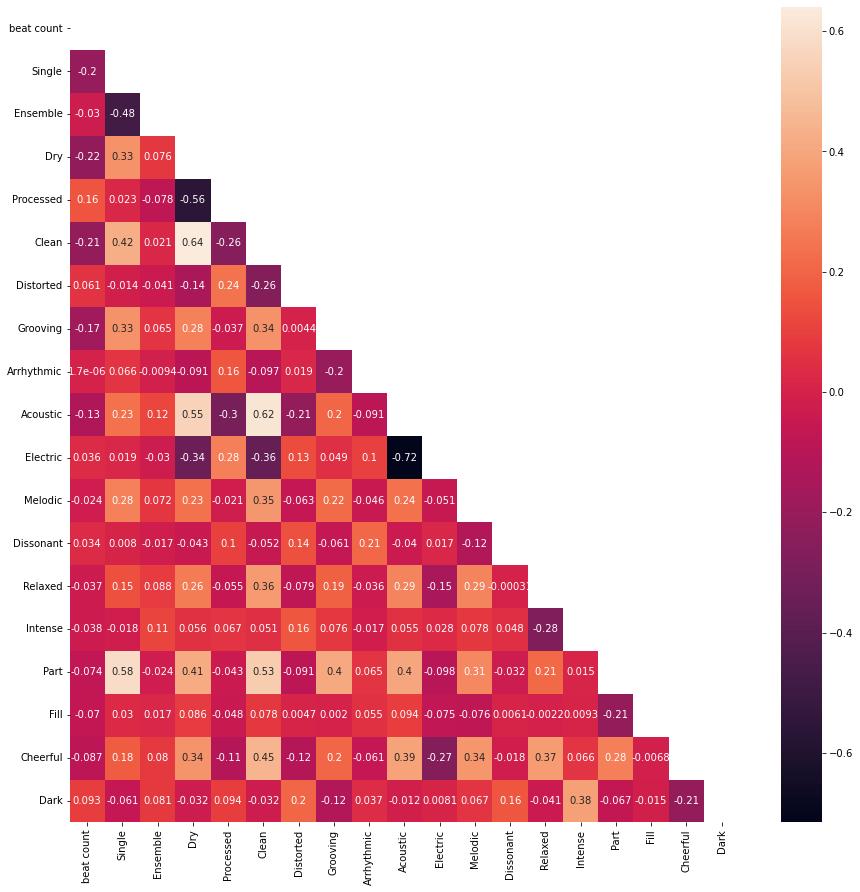

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15)) 
corr = metadata[metadata.columns].corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask = matrix, annot=True)

**We checked heatmap to understand the relation between different categories but the values in 'Genre' and 'Category' are not even 0.5. So we will not consider the relation between different categories.**

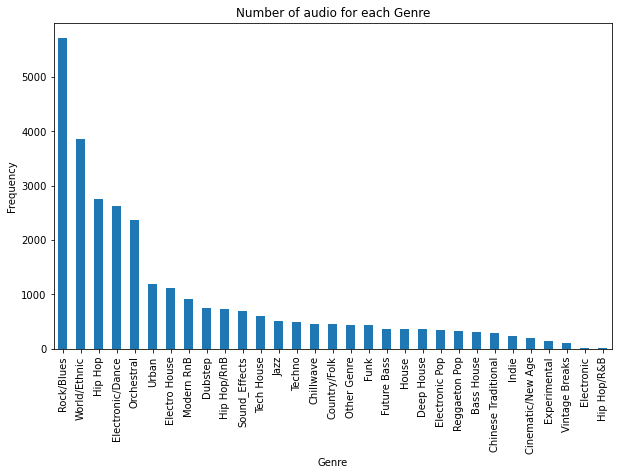

In [16]:
# comparison of nnumber fof audio files in different genre
unique_value_counts = metadata['genre'].value_counts()

plt.figure(figsize=(10, 6))
unique_value_counts.plot.bar()

plt.title('Number of audio for each Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')

plt.show()

In [17]:
# folder path which contains the audio files
audio_dataset_path='C:/Users/singh/Documents/Audio classification using tensor flow/AI in Industry_Project/mp3_data/'

**Mel-frequency cepstral coefficients are commonly used to represent texture or timbre of sound.**
<br>



***MFCCs are commonly derived as follows:***

- Take the Fourier transform of (a windowed excerpt of) a signal.
- Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows or alternatively, cosine overlapping windows.
- Take the logs of the powers at each of the mel frequencies.
- Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
- The MFCCs are the amplitudes of the resulting spectrum.


They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal spectrum. This frequency warping can allow for better representation of sound, for example, in audio compression that might potentially reduce the transmission bandwidth and the storage requirements of audio signals.


In [18]:
# this function is used to extract the mfcc values of any audio file
def features_extractor(file, mfcc_coeff=13):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=mfcc_coeff)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [19]:
extracted_features=[]

# metadata = metadata[0:500]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path)+'\\'+str(row["path"]))
    final_class_labels = row['genre']
#     category = row['category']
    data = features_extractor(file_name, 13)
    # here we called the feature extractor function. It will give us the mfcc values
    extracted_features.append([data, final_class_labels])
    # later this will be converted to a dataframe


29220it [1:36:30,  5.05it/s]


In [20]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])

# got the dataframe 

extracted_features_df.head()

,feature,class
0,"[-325.25125, 158.06506, 9.510126, 32.62123, 15...",Hip Hop
1,"[-165.46893, 82.3457, -23.503113, 49.49431, 2....",Hip Hop
2,"[-342.0217, 19.53419, -47.57484, 20.376026, 4....",Hip Hop
3,"[-229.92265, 61.376972, -22.6652, 28.9281, -19...",Hip Hop
4,"[-364.59586, 129.29053, 25.502563, 37.46732, 2...",Hip Hop


In [100]:
### Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [101]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

### Train Test Split

In [102]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

### Model-1 | ANN

In [103]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [105]:
### No of classes
num_labels=y.shape[1]
print(num_labels)

31


In [106]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(13,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
###second layer
model.add(Dense(200))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))
###third layer
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

### fourth
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))

### fifth
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))

# sbko sigmoid kr k try kro... dropout ghata k try kro... ek layer kam kr k try kro...


###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [107]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1400      
                                                                 
 activation_12 (Activation)  (None, 100)               0         
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 200)               20200     
                                                                 
 activation_13 (Activation)  (None, 200)               0         
                                                                 
 dropout_11 (Dropout)        (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 100)              

In [140]:
# definition of callback for early stopping
from keras.callbacks import ModelCheckpoint, EarlyStopping

callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.00001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [141]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [142]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 3000
num_batch_size = 32

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=callback, verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/3000
585/585 [==============================] - 5s 5ms/step - loss: 1.9354 - accuracy: 0.4144 - val_loss: 2.0749 - val_accuracy: 0.4036
Epoch 2/3000
585/585 [==============================] - 3s 5ms/step - loss: 1.9426 - accuracy: 0.4156 - val_loss: 2.0861 - val_accuracy: 0.3991
Epoch 3/3000
585/585 [==============================] - 3s 5ms/step - loss: 1.9420 - accuracy: 0.4106 - val_loss: 2.0716 - val_accuracy: 0.4050
Epoch 4/3000
585/585 [==============================] - 3s 5ms/step - loss: 1.9415 - accuracy: 0.4134 - val_loss: 2.0775 - val_accuracy: 0.4025
Epoch 5/3000
585/585 [==============================] - 3s 5ms/step - loss: 1.9435 - accuracy: 0.4132 - val_loss: 2.0795 - val_accuracy: 0.4078
Epoch 6/3000
585/585 [==============================] - 3s 5ms/step - loss: 1.9240 - accuracy: 0.4213 - val_loss: 2.0758 - val_accuracy: 0.3978
Epoch 7/3000
585/585 [==============================] - 3s 5ms/step - loss: 1.9352 - accuracy: 0.4183 - val_loss: 2.0817 - val_accuracy:

In [143]:
y_pred = model.predict(X_test)

183/183 [==============================] - 1s 2ms/step


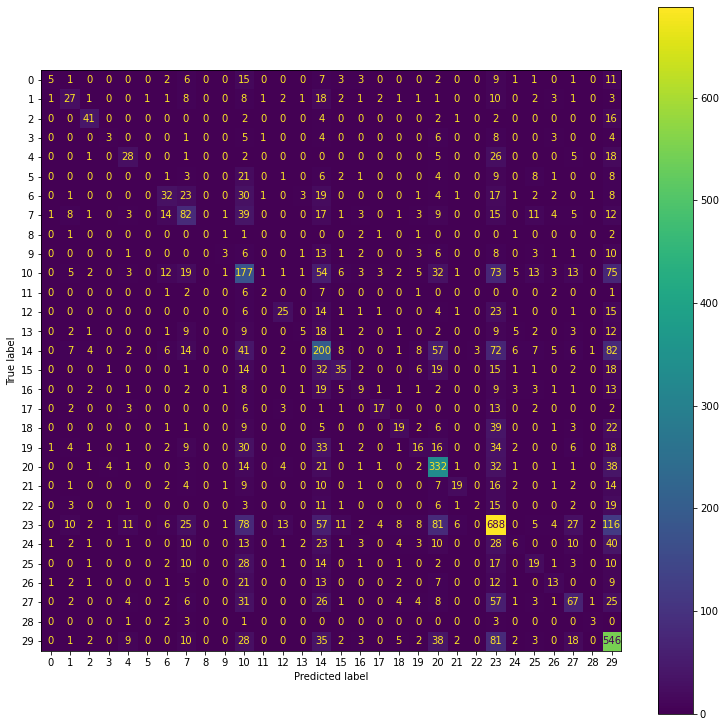

In [144]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)


plt.rcParams['figure.figsize'] = [13, 13]
cm_display.plot()

plt.show()

In [145]:
true_pos = np.diag(confusion_matrix)
false_pos = np.sum(confusion_matrix, axis=0) - true_pos
false_neg = np.sum(confusion_matrix, axis=1) - true_pos

In [146]:
precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)

C:\Users\singh\AppData\Local\Temp\ipykernel_7916\715299745.py:1: RuntimeWarning: invalid value encountered in true_divide
  precision = true_pos / (true_pos + false_pos)


In [147]:
print(precision)
# here we can see the class wise presision

[0.5        0.34177215 0.66129032 0.33333333 0.4        0.
 0.36363636 0.31906615        nan 0.33333333 0.2677761  0.33333333
 0.46296296 0.35714286 0.29368576 0.42168675 0.21428571 0.56666667
 0.37254902 0.23880597 0.49700599 0.57575758 0.4        0.51343284
 0.15384615 0.22352941 0.27659574 0.37640449 0.375      0.46786632]


In [148]:
print(recall)
# below are the class wise recall

[0.07462687 0.28125    0.60294118 0.08571429 0.3255814  0.
 0.21917808 0.35652174 0.         0.05084746 0.34705882 0.09090909
 0.2688172  0.06097561 0.37593985 0.23648649 0.10843373 0.34
 0.17592593 0.09039548 0.72489083 0.21348315 0.03125    0.59005146
 0.03773585 0.17272727 0.14772727 0.27572016 0.23076923 0.69377382]


In [190]:
from sklearn import metrics

accuracy= metrics.accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# y_test_ov.argmax(axis=1), pred_ov.argmax(axis=1)
print("Accuracy:", accuracy*100)

Accuracy: 41.427104722792606


**The accuracy of the model is very poor. Lets try K-nearest to check if it performs better on the audio files**

### K-Nearest Neighbour

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [126]:
!pip install sklearn

In [127]:
!pip install -U imbalanced-learn

In [128]:
from sklearn.neighbors import KNeighborsClassifier


In [129]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [130]:
from sklearn.metrics import precision_recall_fscore_support as score

In [131]:
val = [None] * 16
val[0] = 0
val[1] = 0

for i in range (2, 16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    
    precision, recall, val[i], support=score(y_test, pred_k, average='macro')
 
max_score = max(val)
best_k = val.index(max_score)
print('The best k value is:', best_k)


C:\Users\singh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defi

The best k value is: 3


C:\Users\singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
print(val)

[0, 0, 0.19538765402292593, 0.23870929432206167, 0.17440523878556188, 0.19894198446919495, 0.14986137785397527, 0.16880526684941774, 0.1339084206311086, 0.1509567217599473, 0.1225376182250753, 0.13363564462229885, 0.11035948599294022, 0.12087117256119483, 0.10021833777913311, 0.10774212628016662]


In [133]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
pred_k = knn.predict(X_test)

C:\Users\singh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


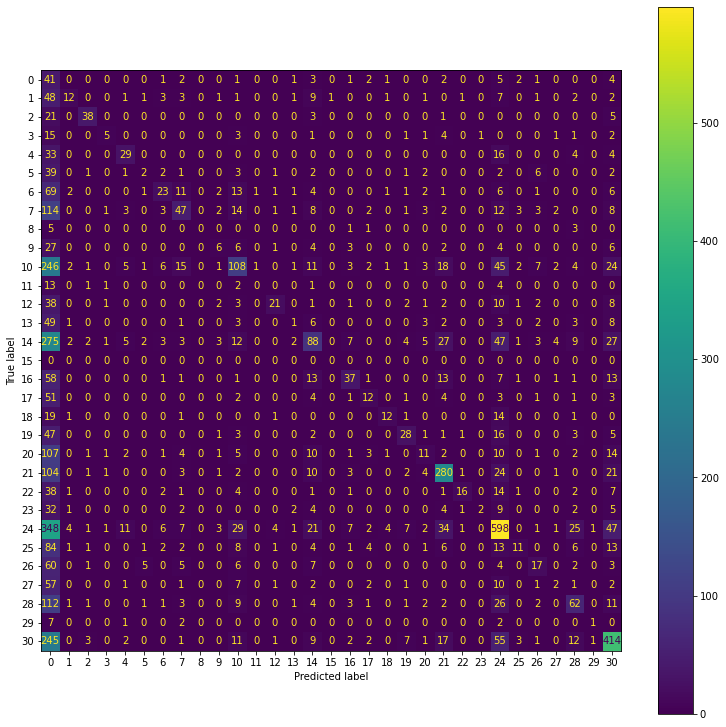

In [134]:
# print(confusion_matrix(y_test, pred))

# print(confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1)))


confusion_matrix_k = metrics.confusion_matrix(y_test.argmax(axis=1), pred_k.argmax(axis=1))

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_k)

plt.rcParams['figure.figsize'] = [13, 13]

cm_display.plot()
plt.show()

In [192]:
true_pos_knn = np.diag(confusion_matrix_k)
false_pos_knn = np.sum(confusion_matrix_k, axis=0) - true_pos_knn
false_neg_knn = np.sum(confusion_matrix_k, axis=1) - true_pos_knn

In [193]:
precision_knn = true_pos_knn / (true_pos_knn + false_pos_knn)
recall_knn = true_pos_knn / (true_pos_knn + false_neg_knn)

C:\Users\singh\AppData\Local\Temp\ipykernel_7916\2412765951.py:1: RuntimeWarning: invalid value encountered in true_divide
  precision_knn = true_pos_knn / (true_pos_knn + false_pos_knn)
C:\Users\singh\AppData\Local\Temp\ipykernel_7916\2412765951.py:2: RuntimeWarning: invalid value encountered in true_divide
  recall_knn = true_pos_knn / (true_pos_knn + false_neg_knn)


In [194]:
print(precision_knn)
# here we can see the class wise presision

[0.01706911 0.42857143 0.73076923 0.41666667 0.47540984 0.14285714
 0.42592593 0.40517241        nan 0.26086957 0.421875   0.
 0.63636364 0.08333333 0.37931034 0.         0.51388889 0.35294118
 0.57142857 0.47457627 0.25581395 0.65882353 0.76190476 0.66666667
 0.61904762 0.44       0.34       0.14285714 0.42465753 0.33333333
 0.62349398]


In [195]:
print(recall_knn)
# below are the class wise recall of the people

[0.6119403  0.125      0.55882353 0.14285714 0.3372093  0.03076923
 0.15753425 0.20434783 0.         0.10169492 0.21176471 0.
 0.22580645 0.01219512 0.16541353        nan 0.25       0.14457831
 0.24       0.25925926 0.06214689 0.61135371 0.17977528 0.03125
 0.51286449 0.06918239 0.15454545 0.02272727 0.25514403 0.07692308
 0.52604828]


In [196]:
from sklearn import metrics

accuracy_knn = metrics.accuracy_score(y_test.argmax(axis=1), pred_k.argmax(axis=1))
print("Accuracy:", accuracy_knn*100)

Accuracy: 32.92265571526352


As KNN gives even worse result, so we will use ANN for the further classification

### Over Sampling

In [150]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='not majority')
X_res_ov, y_res_ov = ros.fit_resample(X,y)

In [151]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train_ov ,X_test_ov ,y_train_ov ,y_test_ov =train_test_split(X_res_ov ,y_res_ov ,test_size=0.2,random_state=0)

X_train_ov, X_val_ov, y_train_ov, y_val_ov = train_test_split(X_train_ov, y_train_ov, test_size=0.2, random_state=1)

In [153]:

callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.00001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [155]:
start = datetime.now()

model.fit(X_train_ov, y_train_ov, batch_size=num_batch_size, epochs=1500, validation_data=(X_val_ov, y_val_ov), callbacks=callback, verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1500
3538/3538 [==============================] - 17s 5ms/step - loss: 1.6914 - accuracy: 0.5043 - val_loss: 1.1795 - val_accuracy: 0.6600
Epoch 2/1500
3538/3538 [==============================] - 17s 5ms/step - loss: 1.6849 - accuracy: 0.5051 - val_loss: 1.1796 - val_accuracy: 0.6549
Epoch 3/1500
3538/3538 [==============================] - 17s 5ms/step - loss: 1.6874 - accuracy: 0.5040 - val_loss: 1.1819 - val_accuracy: 0.6548
Epoch 4/1500
3538/3538 [==============================] - 21s 6ms/step - loss: 1.6897 - accuracy: 0.5040 - val_loss: 1.1764 - val_accuracy: 0.6600
Epoch 5/1500
3538/3538 [==============================] - 23s 6ms/step - loss: 1.6884 - accuracy: 0.5022 - val_loss: 1.1806 - val_accuracy: 0.6583
Epoch 6/1500
3538/3538 [==============================] - 16s 5ms/step - loss: 1.6844 - accuracy: 0.5053 - val_loss: 1.1894 - val_accuracy: 0.6538
Epoch 7/1500
3538/3538 [==============================] - 25s 7ms/step - loss: 1.6880 - accuracy: 0.5035 - val_loss: 1

In [156]:
y_pred_ov = model.predict(X_test_ov)

1106/1106 [==============================] - 3s 3ms/step


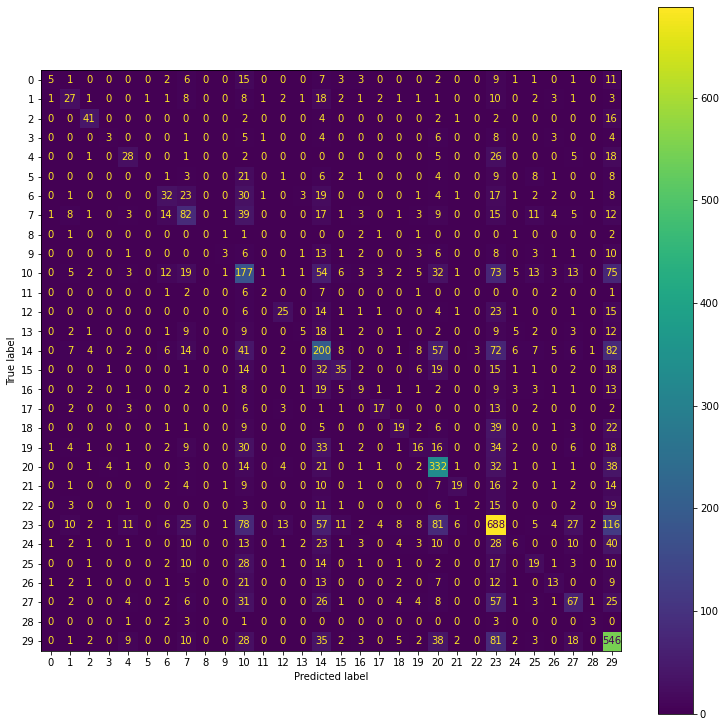

In [157]:
confusion_matrix_ov = metrics.confusion_matrix(y_test_ov.argmax(axis=1), y_pred_ov.argmax(axis=1))

cm_display_ov = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_ov)

plt.rcParams['figure.figsize'] = [13, 13]

cm_display.plot()
plt.show()

In [158]:
true_pos_ov = np.diag(confusion_matrix_ov)
false_pos_ov = np.sum(confusion_matrix_ov, axis=0) - true_pos_ov
false_neg_ov = np.sum(confusion_matrix_ov, axis=1) - true_pos_ov

In [159]:
precision_ov = true_pos_ov / (true_pos_ov + false_pos_ov)
recall_ov = true_pos_ov / (true_pos_ov + false_neg_ov)

In [160]:
print(precision_ov)
# here we can see the class wise presision

[0.76947286 0.64808917 0.81764706 0.79332386 0.7755102  0.53846154
 0.59935897 0.46848739 0.95871946 0.65214385 0.33333333 0.88994458
 0.75281804 0.60326087 0.36969697 0.96843003 0.60447761 0.60550459
 0.78127136 0.64246575 0.47018031 0.50604839 0.81809145 0.69357367
 0.51923077 0.49702128 0.44710425 0.50966023 0.60907945 0.86772487
 0.45250255]


In [161]:
print(recall_ov)
# below are the class wise recall

[0.82184874 0.75231054 0.99197145 0.9920071  0.91607143 0.6081448
 0.48910201 0.39399293 1.         0.81715771 0.07054674 0.99030837
 0.80464716 0.75767918 0.05191489 1.         0.57345133 0.75065617
 0.97608881 0.85117967 0.2945265  0.67352415 0.71815009 0.7790493
 0.21466431 0.49575552 0.5043554  0.68794964 0.4196351  1.
 0.37415541]


In [189]:
accuracy_ov = metrics.accuracy_score(y_test_ov.argmax(axis=1), y_pred_ov.argmax(axis=1))
print("Accuracy:", accuracy_ov*100)

Accuracy: 66.88337384815422


**The accuracy increased when we used over fitting. Which clearly explains that the reason for poor performance of the models ais the unbalanced dataset.**

### Classification on Category

Different number of mfcc coefficients were tried - 8, 13, 39 and it was observed that the 13 cefficients give the best accuraccy so now 13 coefficients will be used to classify the audio files based on the category column.

In [79]:

extracted_features_cat = []

# metadata = metadata[0:500]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path)+'\\'+str(row["path"]))
    final_class_labels = row['category']
#     category = row['category']
    data = features_extractor(file_name, 13)
    # here we called the feature extractor function. It will give us the mfcc values
    extracted_features_cat.append([data, final_class_labels])
    # later this will be converted to a dataframe


29220it [1:44:56,  4.64it/s]


In [163]:
extracted_features_cat_df=pd.DataFrame(extracted_features_cat,columns=['feature','class'])

# got the dataframe 

extracted_features_cat_df.head()

,feature,class
0,"[-325.25125, 158.06506, 9.510126, 32.62123, 15...",Trumpet
1,"[-165.46893, 82.3457, -23.503113, 49.49431, 2....",Timpani
2,"[-342.0217, 19.53419, -47.57484, 20.376026, 4....",Electronic Beats
3,"[-229.92265, 61.376972, -22.6652, 28.9281, -19...",Synthesizer
4,"[-364.59586, 129.29053, 25.502563, 37.46732, 2...",Synthetic Bass


In [164]:
X_cat = np.array(extracted_features_cat_df['feature'].tolist())
y_cat = np.array(extracted_features_cat_df['class'].tolist())

In [165]:
labelencoder=LabelEncoder()
y_cat = to_categorical(labelencoder.fit_transform(y_cat))

In [166]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=0)

X_train_cat, X_val_cat, y_train_cat, y_val_cat = train_test_split(X_train_cat, y_train_cat, test_size=0.2, random_state=1)

In [167]:
### No of classes
num_labels_cat = y_cat.shape[1]
print(num_labels_cat)

78


In [168]:
model_cat = Sequential()
###first layer
model_cat.add(Dense(100,input_shape=(13,)))
model_cat.add(Activation('sigmoid'))
model_cat.add(Dropout(0.2))
###second layer
model_cat.add(Dense(200))
model_cat.add(Activation('sigmoid'))
model_cat.add(Dropout(0.1))
###third layer
model_cat.add(Dense(100))
model_cat.add(Activation('sigmoid'))
model_cat.add(Dropout(0.2))

### fourth
model_cat.add(Dense(100))
model_cat.add(Activation('sigmoid'))
model_cat.add(Dropout(0.1))

### fifth
model_cat.add(Dense(100))
model_cat.add(Activation('sigmoid'))
model_cat.add(Dropout(0.1))

###final layer
model_cat.add(Dense(num_labels_cat))
model_cat.add(Activation('softmax'))

In [169]:
model_cat.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               1400      
                                                                 
 activation_18 (Activation)  (None, 100)               0         
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 200)               20200     
                                                                 
 activation_19 (Activation)  (None, 200)               0         
                                                                 
 dropout_16 (Dropout)        (None, 200)               0         
                                                                 
 dense_20 (Dense)            (None, 100)              

In [170]:
model_cat.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [171]:
start = datetime.now()

model_cat.fit(X_train_cat, y_train_cat, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val_cat, y_val_cat), callbacks=callback, verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/3000
585/585 [==============================] - 7s 6ms/step - loss: 2.9487 - accuracy: 0.1775 - val_loss: 2.6918 - val_accuracy: 0.2055
Epoch 2/3000
585/585 [==============================] - 3s 5ms/step - loss: 2.5702 - accuracy: 0.2268 - val_loss: 2.4013 - val_accuracy: 0.2748
Epoch 3/3000
585/585 [==============================] - 3s 5ms/step - loss: 2.3871 - accuracy: 0.2844 - val_loss: 2.3311 - val_accuracy: 0.2943
Epoch 4/3000
585/585 [==============================] - 3s 5ms/step - loss: 2.3328 - accuracy: 0.2976 - val_loss: 2.2799 - val_accuracy: 0.3201
Epoch 5/3000
585/585 [==============================] - 3s 5ms/step - loss: 2.2935 - accuracy: 0.3088 - val_loss: 2.2560 - val_accuracy: 0.3182
Epoch 6/3000
585/585 [==============================] - 3s 5ms/step - loss: 2.2737 - accuracy: 0.3156 - val_loss: 2.2392 - val_accuracy: 0.3204
Epoch 7/3000
585/585 [==============================] - 3s 5ms/step - loss: 2.2582 - accuracy: 0.3158 - val_loss: 2.2295 - val_accuracy:

In [172]:
y_pred_cat = model_cat.predict(X_test_cat)

183/183 [==============================] - 1s 2ms/step


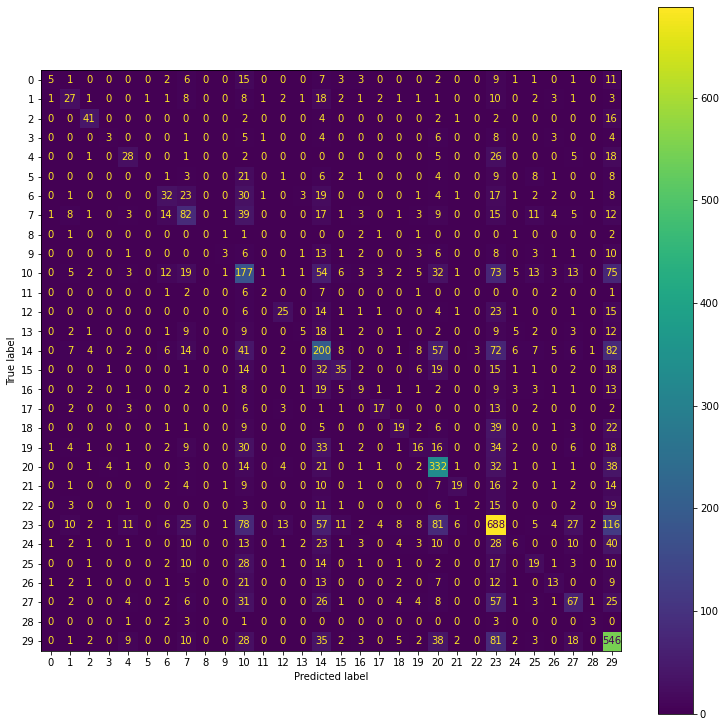

In [173]:
confusion_matrix_cat = metrics.confusion_matrix(y_test_cat.argmax(axis=1), y_pred_cat.argmax(axis=1))

cm_display_cat = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_cat)

plt.rcParams['figure.figsize'] = [13, 13]

cm_display.plot()
plt.show()

In [174]:
true_pos_cat = np.diag(confusion_matrix_cat)
false_pos_cat = np.sum(confusion_matrix_cat, axis=0) - true_pos_cat
false_neg_cat = np.sum(confusion_matrix_cat, axis=1) - true_pos_cat

In [175]:
precision_cat = true_pos_cat / (true_pos_cat + false_pos_cat)
recall_cat = true_pos_cat / (true_pos_cat + false_neg_cat)

C:\Users\singh\AppData\Local\Temp\ipykernel_7916\143777136.py:1: RuntimeWarning: invalid value encountered in true_divide
  precision_cat = true_pos_cat / (true_pos_cat + false_pos_cat)
C:\Users\singh\AppData\Local\Temp\ipykernel_7916\143777136.py:2: RuntimeWarning: invalid value encountered in true_divide
  recall_cat = true_pos_cat / (true_pos_cat + false_neg_cat)


In [176]:
print(precision_cat)
# here we can see the class wise presision

[       nan 0.2        1.                nan 0.         0.59170306
 0.25       0.                nan        nan        nan 0.5
        nan 0.                nan        nan        nan 1.
 0.6237525  0.48387097 0.608      0.8        0.45011086        nan
        nan        nan        nan 0.625             nan 0.
 0.625      0.40046838 0.33333333        nan 0.48291572 0.53571429
 1.         0.52083333        nan 1.                nan 0.43269231
 0.                nan 1.                nan 0.53846154        nan
        nan        nan        nan        nan 0.30952381 0.26666667
        nan 0.55102041 0.35422343 0.44827586        nan 0.33333333
        nan 0.                nan 0.                nan 0.71364653
        nan]


In [177]:
print(recall_cat)
# below are the class wise recall of the people

[0.         0.25       0.15384615 0.         0.         0.78097983
 0.08333333 0.         0.         0.         0.         0.11111111
 0.         0.         0.         0.         0.         0.04761905
 0.67787419 0.27272727 0.52054795 0.2        0.43191489 0.
 0.         0.         0.         0.65151515 0.                nan
 0.63636364 0.7125     0.03448276 0.         0.45299145 0.45454545
 0.03030303 0.43103448 0.         0.25       0.         0.27777778
 0.         0.         0.02941176 0.         0.52434457 0.
 0.         0.         0.         0.         0.43333333 0.05797101
 0.         0.66339066 0.48327138 0.41935484 0.         0.02941176
 0.         0.         0.         0.         0.         0.86216216
 0.        ]


In [188]:
accuracy_cat = metrics.accuracy_score(y_test_cat.argmax(axis=1), y_pred_cat.argmax(axis=1))
print("Accuracy:", accuracy_cat*100)

Accuracy: 52.44695414099931


### COMPARISON

In [179]:
# !pip install tabulate

In [180]:
from tabulate import tabulate

In [203]:
data = [["Genre", "ANN", "Original", accuracy*100], 
        ["Genre", "KNN", "Original", accuracy_knn*100], 
        ["Genre", "ANN", "Over Sampled", accuracy_ov*100], 
        ["Category", "ANN", "Original", accuracy_cat*100],]
  
#define header names
col_names = ["Class", "Model", "Dataset", "Accuracy"]
  
#display table
print(tabulate(data, headers=col_names))

Class     Model    Dataset         Accuracy
--------  -------  ------------  ----------
Genre     ANN      Original         41.4271
Genre     KNN      Original         32.9227
Genre     ANN      Over Sampled     66.8834
Category  ANN      Original         52.447


We observe that the ANN model performed better on the dataset but still the accuracy is low.
<br>
As wee see the performance of the model improved when we used the oversampled dataset, we can conclude that the main reason behind the poor accuracy is the unbalanced dataset.
<br>
The similar approach can be applied to classify the other classes of the dataset.